In [1]:
import pandas as pd
import numpy as np
import random as rnd
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv("./input/train.csv")
test_df = pd.read_csv("./input/test.csv")
combine = [train_df, test_df]

# Analyze by describing data

In [3]:
print(list(train_df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


- 범주형: Survived, Sex, Embarked
- 순서형: Pclass

- 연속형: Age, Fare 
- 이산형: SibSp, Parch

- SibSp: # of siblings / spouses aboard the Titanic
- Parch: # of parents / children aboard the Titanic

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


- ticket: 문자+숫자 or 숫자 형태
- Cabin: 문자+숫자
- Name: 특수문자도 다소 포함됨

In [5]:
train_df.info()
print('_'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0  

- 결측치 수 

    in train: Cabin > Age > Embarked
    
    in test: Cabin > Age > Fare

### Numeric 확인

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#train_df.describe()
train_df.describe(percentiles=[.61,.62])
#train_df.describe(percentiles=[.75,.8])
#train_df.describe(percentiles=[.68,.69])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
61%,543.900000,0.000000,3.000000,32.000000,0.000000,0.000000,23.225000
62%,552.800000,1.000000,3.000000,32.000000,0.000000,0.000000,24.150000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 전체의 약 38%정도 생존했다.
- 전체의 75%이상이 부모님이나 아이를 동반하지 않았다.

### 범주형 확인

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sage, Miss. Dorothy Edith ""Dolly""",male,1601,B96 B98,S
freq,1,577,7,4,644


# Analyze by pivoting features

In [9]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex","Survived"]].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp","Survived"]].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch","Survived"]].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Analyze by visualizing data

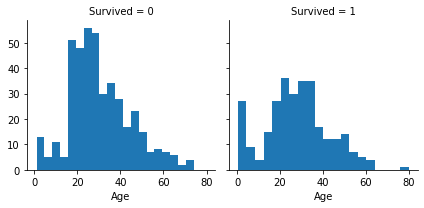

In [13]:
g=sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist,'Age',bins=20)

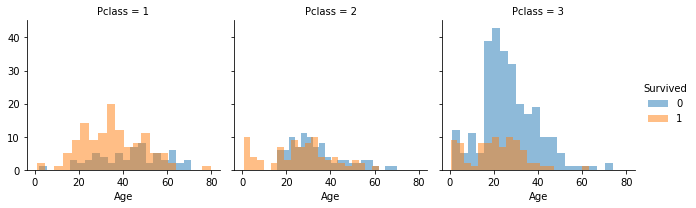

In [14]:
grid=sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age',alpha=.5,bins=20)
grid.add_legend()

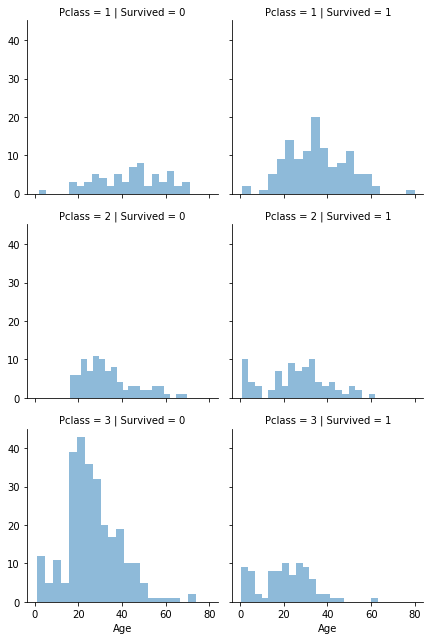

In [15]:
grid=sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age',alpha=.5,bins=20)
grid.add_legend()

# Correlating Categorical Features

C:\Users\franc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\franc\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


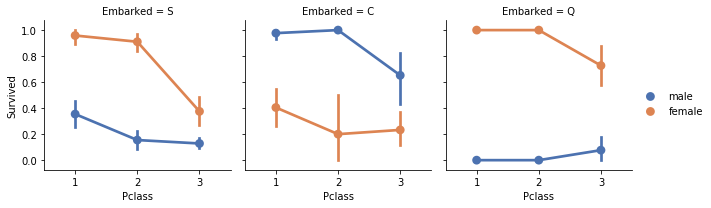

In [16]:
#gird=sns.FacetGrid(train_df, col='Embarked')
grid=sns.FacetGrid(train_df, col='Embarked')
grid.map(sns.pointplot, 'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

# Correlating categorical and numerical features

In [1]:
grid=sns.FacetGrid(train_df, row='Embarked',col='Survived')
grid.map(sns.barplot, 'Sex','Fare', ci=None)
grid.add_legend()

NameError: name 'sns' is not defined

# Wrangle data

## Correcting by dropping features

In [18]:
print("Before:",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)
train_df = train_df.drop(['Ticket','Cabin'],axis=1)
test_df = test_df.drop(['Ticket','Cabin'],axis=1)
combine = [train_df,test_df]
print("After:",train_df.shape,test_df.shape,combine[0].shape,combine[1].shape)

Before: (891, 12) (418, 11) (891, 12) (418, 11)
After: (891, 10) (418, 9) (891, 10) (418, 9)


## Creating new feature extracting from existing

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady','Countess','Capt','Col',
                                        'Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    
train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [21]:
title_mapping = defaultdict(int)
for t in train_df['Title'].unique():
    title_mapping[t]=1

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,8.0500,S,1
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,C,1
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,63.3583,C,1
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,23.0000,S,1


In [22]:
train_df=train_df.drop(['Name','PassengerId'],axis=1)
test_df=test_df.drop(['Name'],axis=1)
combine=[train_df,test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

## Converting a categorical feature

In [23]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,1
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,1


## Completing a numerical continuous feature

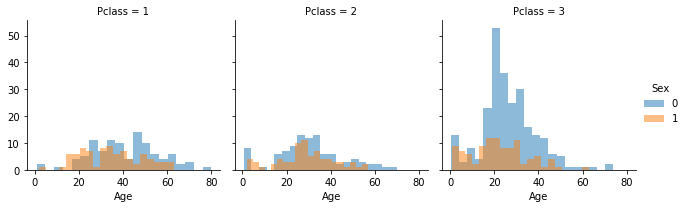

In [24]:
grid=sns.FacetGrid(train_df,col='Pclass',hue='Sex')
#grid=sns.FacetGrid(train_df, col='Sex',row='Pclass')
grid.map(plt.hist, 'Age',alpha=0.5, bins=20)
grid.add_legend()

In [25]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [26]:
for dataset in combine:
    for i in range(2):
        for j in range(3):
            guess_df=dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess=guess_df.median()
            guess_ages[i,j]=int(age_guess/0.5+0.5)*0.5
            
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex']==i) & (dataset['Pclass']==j+1),'Age']=guess_ages[i,j]
            
    dataset['Age']=dataset['Age'].astype(int)

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,1
2,1,3,1,26,0,0,7.9250,S,1
3,1,1,1,35,1,0,53.1000,S,1
4,0,3,0,35,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,S,1
887,1,1,1,19,0,0,30.0000,S,1
888,0,3,1,21,1,2,23.4500,S,1
889,1,1,0,26,0,0,30.0000,C,1


In [27]:
train_df['AgeBand'] = pd.cut(train_df['Age'],5)
train_df[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

AgeBand_lst=sorted(train_df['AgeBand'].unique())
for dataset in combine:
    for i in range(len(AgeBand_lst)):
        dataset.loc[(train_df['Age'] > AgeBand_lst[i].left) & (dataset['Age'] <= AgeBand_lst[i].right),'Age']=i
        
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,1,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,1,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,1,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
train_df=train_df.drop(['AgeBand'],axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,1
2,1,3,1,1,0,0,7.9250,S,1
3,1,1,1,2,1,0,53.1000,S,1
4,0,3,0,2,0,0,8.0500,S,1


In [29]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
    
train_df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone'] = 1
    
train_df[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [31]:
train_df = train_df.drop(['Parch','SibSp','FamilySize'],axis=1)
test_df = test_df.drop(['Parch','SibSp','FamilySize'],axis=1)

combine=[train_df,test_df]
combine[0]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,1,0
2,1,3,1,1,7.9250,S,1,1
3,1,1,1,2,53.1000,S,1,0
4,0,3,0,2,8.0500,S,1,1
...,...,...,...,...,...,...,...,...
886,0,2,0,1,13.0000,S,1,1
887,1,1,1,1,30.0000,S,1,1
888,0,3,1,1,23.4500,S,1,0
889,1,1,0,1,30.0000,C,1,1


In [32]:
for dataset in combine:
    dataset['Age*Class']=dataset['Age']*dataset['Pclass']
train_df.loc[:, ['Age*Class','Age','Pclass']]

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
...,...,...,...
886,2,1,2
887,1,1,1
888,3,1,3
889,1,1,1


## Completing a categorical feature

In [33]:
freq_port=train_df['Embarked'].dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## Converting categorical feature to numeric

In [35]:
Embarked_mapping=defaultdict(int)
for i,t in enumerate(train_df['Embarked'].unique()):
    Embarked_mapping[t]=i

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,1,0,2
2,1,3,1,1,7.9250,0,1,1,3
3,1,1,1,2,53.1000,0,1,0,2
4,0,3,0,2,8.0500,0,1,1,6


## Quick completing and converting a numeric feature

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,34,7.8292,2,1,1,102
1,893,3,1,47,7.0000,0,1,0,141
2,894,2,0,62,9.6875,2,1,1,124
3,895,3,0,27,8.6625,0,1,1,81
4,896,3,1,22,12.2875,0,1,0,66


In [37]:
train_df['FareBand']=pd.qcut(train_df['Fare'],4)
train_df[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [38]:
FareBand_lst=sorted(train_df['FareBand'].unique())
FareBand_lst

[Interval(-0.001, 7.91, closed='right'),
 Interval(7.91, 14.454, closed='right'),
 Interval(14.454, 31.0, closed='right'),
 Interval(31.0, 512.329, closed='right')]

In [39]:
for dataset in combine:
    for i in range(len(FareBand_lst)):
        dataset.loc[(train_df['Fare'] > FareBand_lst[i].left) & (dataset['Fare'] <= FareBand_lst[i].right),'Fare']=i
        
    dataset['Fare']=dataset['Fare'].astype(int)
train_df = train_df.drop(['FareBand'],axis=1)

combine=[train_df,test_df]
combine[0]

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,1,0,2
2,1,3,1,1,1,0,1,1,3
3,1,1,1,2,3,0,1,0,2
4,0,3,0,2,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,1,0,1,1,2
887,1,1,1,1,2,0,1,1,1
888,0,3,1,1,2,0,1,0,3
889,1,1,0,1,2,1,1,1,1


# Model, Predict and Solve

In [40]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

## Logistic Reg.
- coeff 확인

In [60]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train)*100, 2)

coeff_df = pd.DataFrame(train_df.columns.delete(0)) # Feature들을 행으로 사용
coeff_df.columns = ['Feature']
coeff_df["Correlation"]=pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation',ascending=False)

C:\Users\franc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Feature,Correlation
1,Sex,2.502978
5,Title,0.696348
4,Embarked,0.262183
6,IsAlone,0.050172
3,Fare,0.013475
7,Age*Class,-0.119242
2,Age,-0.316662
0,Pclass,-1.013761


## 모델 비교하기

- Logistic Reg.
- SVM
- KNN
- Gaussian Naive Bayes
- Perceptron
- Linear SVM
- DecisionTree
- RandomForest

In [59]:
models=[LogisticRegression(), SVC(), KNeighborsClassifier(n_neighbors=3), GaussianNB(), 
        Perceptron(), LinearSVC(), SGDClassifier(), DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100)]

result=pd.DataFrame()
tmp=[]
for i, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    acc=round(model.score(X_train, Y_train)*100,2)
    model_name=str(type(model)).split('.')[-1].split("'")[0]
    if model_name[-4:]=="fier":
        model_name=model_name.split('Class')[0]
    tmp.append([model_name,acc])

pd.DataFrame(tmp,columns=['Model','Acc']).sort_values(by="Acc",ascending=False)

C:\Users\franc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\franc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\franc\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,Model,Acc
7,DecisionTree,85.75
8,RandomForest,85.75
1,SVC,82.72
2,KNeighbors,82.72
0,LogisticRegression,79.80
5,LinearSVC,79.80
3,GaussianNB,71.94
4,Perceptron,70.15
6,SGD,70.03
